In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Set up Splinter
browser = Browser('chrome')
# Set up base url
base_url = "https://www.facebook.com/marketplace/toronto/search?"
# Set up search parameters
min_price = 1000
max_price = 30000
days_listed = 7
min_mileage = 50000
max_mileage = 200000
min_year = 2000
max_year = 2020
transmission = "automatic"
query = "Honda Civic"
#Set up full url
url = f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&maxMileage={max_mileage}&maxYear={max_year}&minMileage={min_mileage}&minYear={min_year}&transmissionType={transmission}&query={query}&exact=false"

In [3]:
# Visit the website
browser.visit(url)

In [4]:
# Scroll down to load more results
scroll_count = 2
scroll_delay = 2

for _ in range(scroll_count):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_delay)

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="en"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/ye/r/Ta8_J_nYekI.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" href="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 0, 0, 0.6);--fds-black-alpha-80:rgba(0, 0,
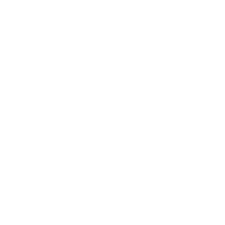

In [5]:
# Parse the HTML
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
market_soup = soup(html, 'html.parser')
# Check if HTML was scraped correctly
market_soup

In [6]:
# Extract all the necessary info and insert into lists
titles_div = market_soup.find_all('span', class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
titles_list = [title.text.strip() for title in titles_div]
prices_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u")
prices_list = [price.text.strip() for price in prices_div]
mileage_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x3x7a5m x1nxh6w3 x1sibtaa xo1l8bm xi81zsa")
mileage_list = [mileage.text.strip() for mileage in mileage_div]
urls_div = market_soup.find_all('a', class_="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1lku1pv")
urls_list = [url.get('href') for url in urls_div]

In [7]:
# Extracted mileage list (separate from location and extract numeric values only)
mileage_pattern_km = r'(\d+)K km'
mileage_pattern_miles = r'(\d+)K miles'

mileage_clean = []
for item in mileage_list:
    match_mileage_km = re.search(mileage_pattern_km, item)
    match_mileage_miles = re.search(mileage_pattern_miles, item)
    if match_mileage_km or match_mileage_miles:
        if match_mileage_km:
            mileage_clean.append(int(match_mileage_km.group(1)) * 1000)
        else:
            mileage_clean.append(int(match_mileage_miles.group(1)))

In [8]:
# Add all values to a list of dictionaries
vehicles_list = []

for i, item in enumerate(titles_list):
    cars_dict = {}
    
    title_split = titles_list[i].split()
    
    cars_dict["Year"] = int(title_split[0])
    cars_dict["Make"] = title_split[1]
    cars_dict["Model"] = title_split[2]
    cars_dict["Price"] = int(re.sub(r'[^\d.]', '', prices_list[i]))
    cars_dict["Mileage"] = mileage_clean[i]
    cars_dict["URL"] = urls_list[i]
    vehicles_list.append(cars_dict)
    
print(vehicles_list)

[{'Year': 2012, 'Make': 'Honda', 'Model': 'civic', 'Price': 7600, 'Mileage': 175000, 'URL': '/marketplace/item/223009170500895/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2017, 'Make': 'Honda', 'Model': 'civic', 'Price': 18000, 'Mileage': 78000, 'URL': '/marketplace/item/109313038843410/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2007, 'Make': 'Honda', 'Model': 'civic', 'Price': 4400, 'Mileage': 190000, 'URL': '/marketplace/item/247934517928475/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2009, 'Make': 'Honda', 'Model': 'civic', 'Price': 7500, 'Mileage': 183000, 'URL': '/marketplace/item/210458188056965/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2006, 'Make': 'Honda', 'Model': 'civic', 'Price': 3300, 'Mileage': 72000, 'URL': '/marketplace/item/721882319743571/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'}, {'Year': 2

In [9]:
vehicles_df = pd.DataFrame(vehicles_list)
vehicles_df.tail()

,Year,Make,Model,Price,Mileage,URL
65,2009,Honda,civic,9000,195000,/marketplace/item/920081679222800/?ref=search&...
66,2012,Honda,civic,11990,149000,/marketplace/item/1462500797830782/?ref=search...
67,2008,Honda,civic,4850,180000,/marketplace/item/1417326199064438/?ref=search...
68,2013,Honda,civic,13000,125000,/marketplace/item/1353233631902872/?ref=search...
69,2018,Honda,civic,14000,132000,/marketplace/item/1368211313740617/?ref=search...


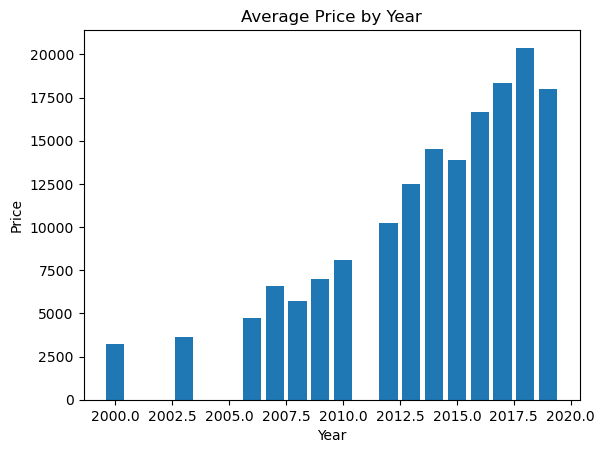

In [10]:
# Group the data by "Year" and calculate the mean price for each year
yearly_prices = vehicles_df.groupby("Year")["Price"].mean()

# Create the column chart
plt.bar(yearly_prices.index, yearly_prices.values)

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Price by Year")

# Show the chart
plt.show()

In [11]:
# Filter the DataFrame for 2018 Honda Civics
filtered_df = vehicles_df[(vehicles_df["Year"] == 2018) & (vehicles_df["Make"] == "Honda") & (vehicles_df["Model"] == "civic")]

# Sort the filtered DataFrame by price in ascending order
sorted_df = filtered_df.sort_values("Price")

# Get the cheapest 2018 Honda Civic URL
cheapest_civic_url = sorted_df.iloc[0]["URL"]

print(f"https://www.facebook.com/{cheapest_civic_url}")

https://www.facebook.com//marketplace/item/1368211313740617/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD


In [12]:
# End the automated browsing session
browser.quit()